# Split 3

In this working split, we analyze questions 4.2 and 4.3. These require the
implementation of a Self-Organizing Map (SOM) similar to that implemented in
question 4.1 (available in [split2](./split2.ipynb)) 

## Question 4.2

In [1]:
import pandas as pd

data = pd.read_csv("./data/cities.dat", header=None, comment="%").values
data

array([[0.4   , 0.4439],
       [0.2439, 0.1463],
       [0.1707, 0.2293],
       [0.2293, 0.761 ],
       [0.5171, 0.9414],
       [0.8732, 0.6536],
       [0.6878, 0.5219],
       [0.8488, 0.3609],
       [0.6683, 0.2536],
       [0.6195, 0.2634]])

In [2]:
from tools import KohonenSOM

som = KohonenSOM(2, (10, 1), k0=2, circular=True, n_epochs=20)
history = som.fit(data)

In [3]:
centroids = som.centroids
centroids

array([[0.8435126 , 0.36230856],
       [0.7701908 , 0.58027145],
       [0.67469327, 0.65149534],
       [0.51625378, 0.9337432 ],
       [0.23609802, 0.75848832],
       [0.39562557, 0.44672792],
       [0.17643584, 0.23317709],
       [0.24892644, 0.15081219],
       [0.53976133, 0.2575901 ],
       [0.64125567, 0.25913965]])

In [4]:
import numpy as np

winners = som.predict(data)
path = [
                name
                for _, name in sorted(zip(som.predict(data)[:, 0], data), key=lambda pair: pair[0])
            ]
path = np.array(path)
path = np.vstack([path, path[0]])

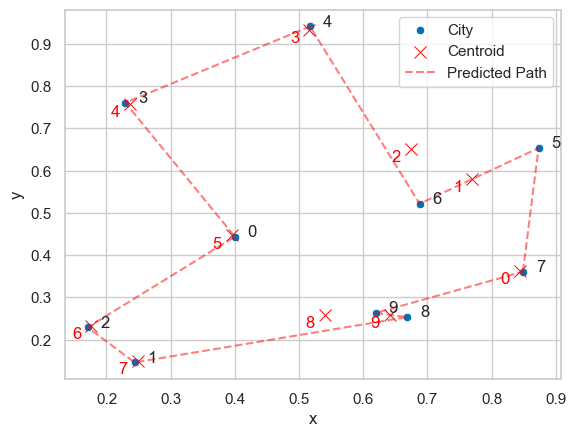

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context="notebook", style="whitegrid", palette="colorblind")

sns.scatterplot(x=data[:, 0], y=data[:, 1], label = "City")
plt.xlabel("x")
plt.ylabel("y")

for i, point in enumerate(data):
    plt.gca().text(point[0]+0.02, point[1], f"{i}")

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker="x", s=75, color='red', label="Centroid")

for i, point in enumerate(centroids):
    plt.gca().text(point[0]-0.03, point[1]-0.03, f"{i}", color="red")

plt.plot(path[:, 0], path[:, 1], linestyle='dashed', alpha=0.5, color="red", label="Predicted Path")
plt.legend()

plt.savefig("./imgs/split3_TSP.pdf")

## Question 4.3

In [6]:
import pandas as pd

data = pd.read_csv("./data/votes.dat", header=None).values.reshape(-1, 31)

In [7]:
from tools import KohonenSOM

som = KohonenSOM(31, (10, 10), k0=5)
history = som.fit(data)

In [8]:
votes = som.predict(data)

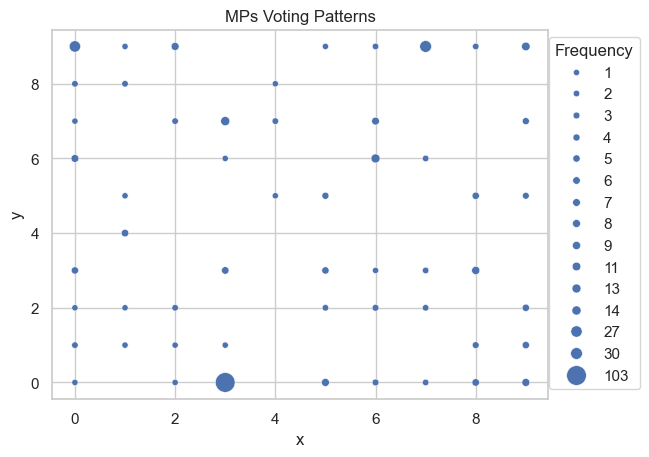

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context="notebook", style="whitegrid")

df = pd.DataFrame({'x': votes[:, 0], 'y': votes[:, 1]})

freq = df.groupby(['x', 'y']).size().reset_index(name='frequency')

sns.scatterplot(data=freq, x='x', y='y', size="frequency", legend="full", sizes=(20, 200))

plt.title("MPs Voting Patterns")
plt.legend(title='Frequency', loc='upper right', bbox_to_anchor=(1.20, 1))
plt.savefig("./imgs/split3_mps.pdf")

### Gender

In [10]:
gender = pd.read_csv(
    "./data/mpsex.dat", header=None, comment="%", names=["Gender"]
)
gender = gender.replace([0, 1], ["Male", "Female"])
df["Gender"] = gender
df

,x,y,Gender
0,7,9,Male
1,0,9,Male
2,9,7,Male
3,7,9,Male
4,3,0,Female
...,...,...,...
344,3,0,Female
345,3,0,Female
346,3,0,Female
347,5,9,Male


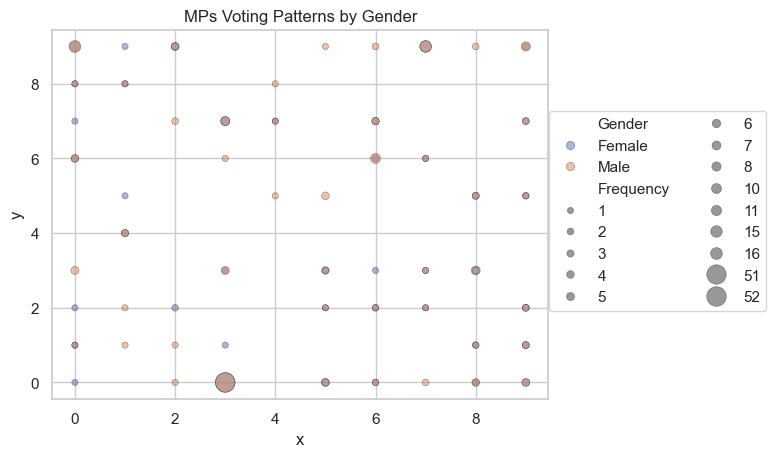

In [11]:
freq = df.groupby(["x", "y", "Gender"]).size().reset_index(name="Frequency")

sns.scatterplot(
    data=freq,
    x="x",
    y="y",
    size="Frequency",
    hue="Gender",
    alpha=0.5,
    legend="full",
    sizes=(20, 200),
    edgecolor="black",
)
plt.legend(bbox_to_anchor=(1.455, 0.8), loc="upper right", ncol=2)
plt.title("MPs Voting Patterns by Gender")
plt.savefig("./imgs/split3_mps_gender.pdf")

### Party

In [12]:
party = pd.read_csv("./data/mpparty.dat", header=None, comment="%")
party = party.replace({0:"no party", 1: "m", 2: "fp", 3: "s", 4: "v", 5: "mp", 6: "kd", 7:"c"})
df["Party"] = party

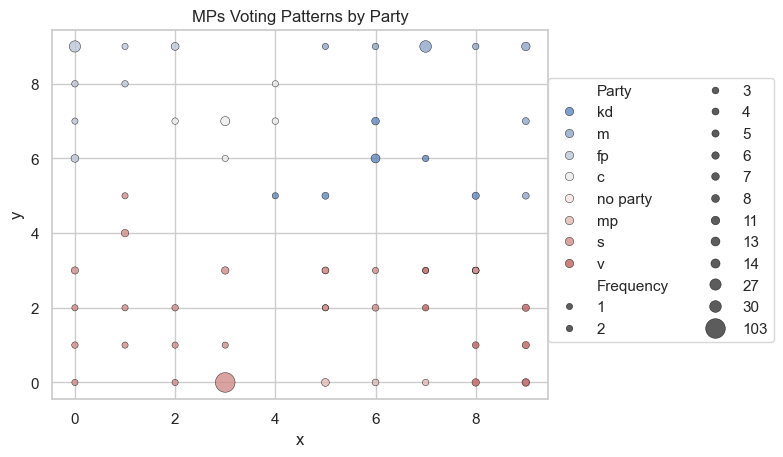

In [13]:
freq = df.groupby(["x", "y", "Party"]).size().reset_index(name="Frequency")

sns.scatterplot(
    data=freq,
    x="x",
    y="y",
    size="Frequency",
    hue="Party",
    alpha=0.8,
    legend="full",
    sizes=(20, 200),
    edgecolor="black",
    palette="vlag",
    hue_order=["kd", "m", "fp", "c", "no party", "mp", "s", "v"]
)
plt.legend(bbox_to_anchor=(1.47, 0.89), loc="upper right", ncol=2)
plt.title("MPs Voting Patterns by Party")
plt.savefig("./imgs/split3_mps_party.pdf")

### District

In [14]:
district = pd.read_csv("./data/mpdistrict.dat", header=None, comment="%")
df["District"] = district

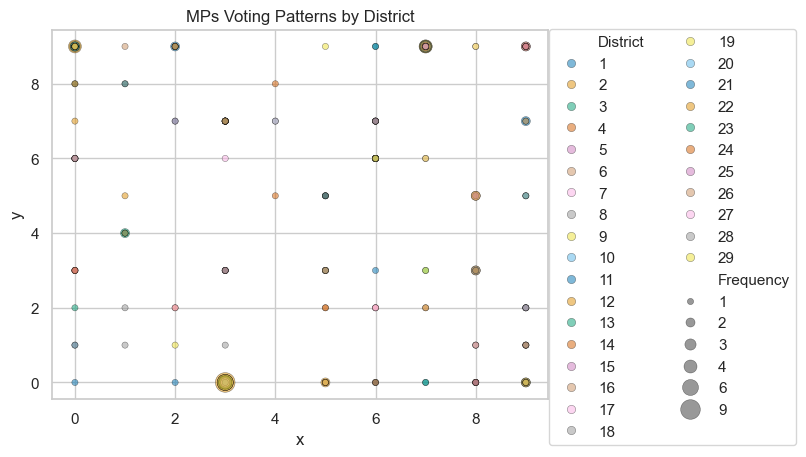

In [15]:
freq = df.groupby(["x", "y", "District"]).size().reset_index(name="Frequency")

sns.scatterplot(
    data=freq,
    x="x",
    y="y",
    size="Frequency",
    hue="District",
    alpha=0.5,
    legend="full",
    sizes=(20, 200),
    edgecolor="black",
    palette="colorblind"
)
plt.legend(bbox_to_anchor=(1.515, 1.022), loc="upper right", ncol=2)
plt.title("MPs Voting Patterns by District")
plt.savefig("./imgs/split3_mps_district.pdf")